#NIT Internship Project - Handwritten Digit Recognition

Name: Prabhat Kuamr Singh Gaur

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv')
print(df.shape)

(42000, 785)


In [77]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df.shape

(42000, 785)

In [79]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [80]:
X = df.drop('label' , axis='columns') #Features
Y = df['label'] #Labels

In [81]:
X.values[3056]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58,  73, 163,
       215, 254, 215,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  36,  74, 22

5


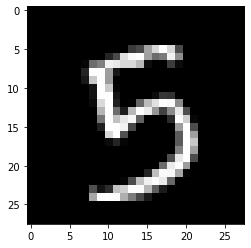

In [82]:
print(Y[3056])

import matplotlib.pyplot as plt
plt.imshow(X.values[3056].reshape(28,28) , cmap='gray')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [84]:
xtrain

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
ytrain.shape

(31500,)

In [86]:
ytrain

29875    4
35329    7
33254    7
30820    2
2144     9
        ..
26865    4
38941    0
17367    1
30667    9
26419    6
Name: label, Length: 31500, dtype: int64

In [87]:
xtrain.shape

(31500, 784)

In [88]:
import numpy as np
xtr = xtrain
xtrain = np.array(xtrain)

In [89]:
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28,1)
xtrain.shape

(31500, 28, 28, 1)

In [90]:
xte = xtest
xtest = np.array(xtest)
xtest= xtest.reshape(xtest.shape[0], 28, 28,1)
xtest.shape

(10500, 28, 28, 1)

In [91]:
mean_px = xtrain.mean().astype(np.float32)
std_px = xtrain.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [92]:
from keras.utils.np_utils import to_categorical
ytrain= to_categorical(ytrain)
num_classes = ytrain.shape[1]
num_classes

10

In [93]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [94]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 28, 28, 1)         0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_53 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [95]:
from keras import optimizers
from keras import metrics

model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy' ,
              metrics = ['accuracy'])

In [96]:
model.fit(xtrain,ytrain,epochs=30)

Epoch 1/30
985/985 [==============================] - 2s 2ms/step - loss: 0.4967 - accuracy: 0.8550
Epoch 2/30
985/985 [==============================] - 2s 2ms/step - loss: 0.3385 - accuracy: 0.9012
Epoch 3/30
985/985 [==============================] - 2s 2ms/step - loss: 0.3128 - accuracy: 0.9101
Epoch 4/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2991 - accuracy: 0.9145
Epoch 5/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2899 - accuracy: 0.9178
Epoch 6/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2833 - accuracy: 0.9192
Epoch 7/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2782 - accuracy: 0.9214
Epoch 8/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2743 - accuracy: 0.9216
Epoch 9/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2703 - accuracy: 0.9229
Epoch 10/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2675 - accuracy: 0.9239

In [113]:
test_pred = pd.DataFrame( model.predict([xte]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,0
1,2,2
2,3,7
3,4,5
4,5,8
